In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display

%matplotlib inline

In [33]:
path = "C:/Users/ravit/Desktop/adult-data.csv"
df = pd.read_csv(path)

df.columns = ['age','work-class','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',\
              'capital-gain','capital-loss','hours-per-week','native-country','Salary']

df = df.drop(['fnlwgt'],axis=1)

df.head(5)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
df.Salary = df.Salary.map(lambda x : 1 if x.find('>') != -1 else 0)

In [35]:
df.head(5)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [36]:
df.replace(' ?',np.nan,inplace=True)


In [37]:
print("Total rows = {0}".format(df.shape[0]))
print("Number of rows that contain na values = {0}".format(df.shape[0] - df.dropna().shape[0]))

df.dropna(inplace=True)

Total rows = 32560
Number of rows that contain na values = 2399


In [38]:
print("Number of rows that contain na values = {0}".format(df.shape[0] - df.dropna().shape[0]))

Number of rows that contain na values = 0


In [39]:
print("Percentage of rows with Salary > 50K = {0}%".format(100 * len(df.loc[df['Salary'] == 1])/df.shape[0]))
print("Percentage of rows with Salary <= 50K = {0}%".format(100 * len(df.loc[df['Salary'] == 0])/df.shape[0]))

Percentage of rows with Salary > 50K = 24.89307383707437%
Percentage of rows with Salary <= 50K = 75.10692616292563%


In [40]:
Y = df['Salary']
X = df.drop(['Salary'],axis = 1)

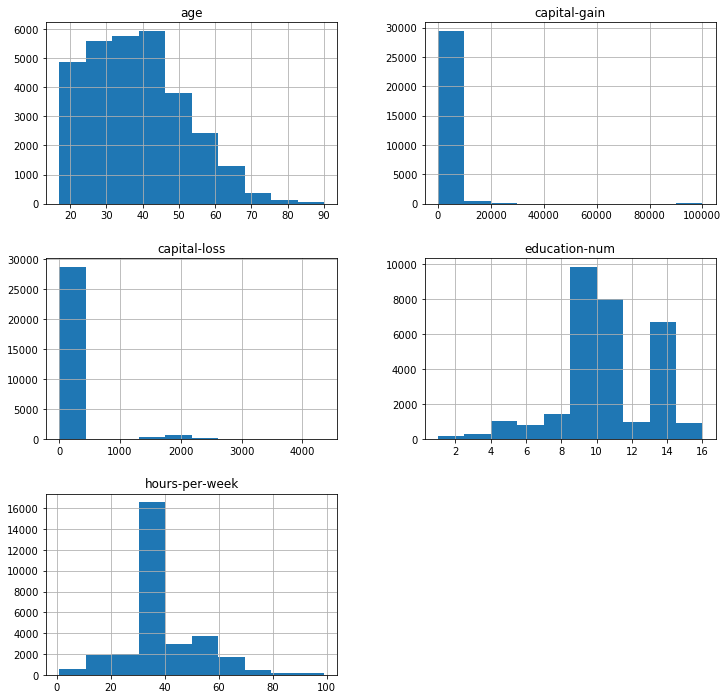

In [41]:
X.hist(figsize=(12, 12))
plt.show()

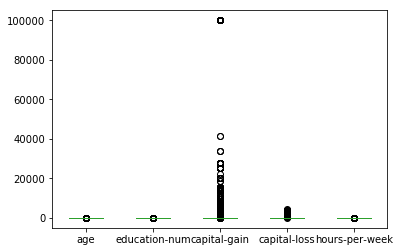

In [11]:
X.plot.box()

In [42]:
skewed_features = ['capital-gain', 'capital-loss']
X_log_transformed = pd.DataFrame(data = X)
X_log_transformed[skewed_features] = X[skewed_features].apply(lambda x: np.log(x + 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B066375208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B065EA78D0>]], dtype=object)

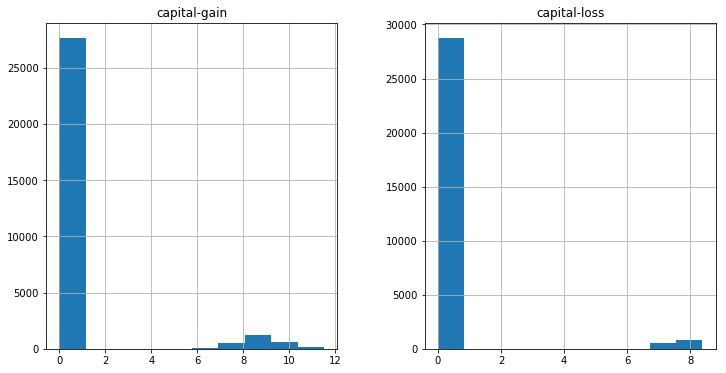

In [43]:
X_log_transformed.loc[:,['capital-gain', 'capital-loss']].hist(figsize=(12,6))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_log_minmax_transform = pd.DataFrame(data = X_log_transformed)
X_log_minmax_transform[numerical] = scaler.fit_transform(X_log_transformed[numerical])

display(X_log_minmax_transform.head(n = 5))

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States


In [45]:
X_final = pd.get_dummies(X_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(X_final.columns)

print("{} total features after one-hot encoding.".format(len(encoded)))

X_final.head()

103 total features after one-hot encoding.


,age,education-num,capital-gain,capital-loss,hours-per-week,work-class_ Federal-gov,work-class_ Local-gov,work-class_ Private,work-class_ Self-emp-inc,work-class_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24128 samples.
Testing set has 6033 samples.


In [47]:
from sklearn.metrics import f1_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test,fold_number): 
    
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train,y_train)
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    results['pred_time'] = end - start
    
    results['f_train'] = f1_score(y_true = y_train,y_pred = predictions_train,average='micro')
        
    results['f_test'] = f1_score(y_true = y_test ,y_pred = predictions_test,average='micro')
       
    # Success
    print("{} trained on {} fold.".format(learner.__class__.__name__, fold_number))
        
    # Return the results
    return results

In [48]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#K-Fold Cross Validation (5-Fold)
kf = KFold(n_splits = 5, random_state = 8)

#Our 3 classifiers
clf_A = MultinomialNB()
clf_B = LogisticRegression(random_state = 0)
clf_C = RandomForestClassifier(random_state = 0)
split_count = 0

results = {}

for train_index, val_index in kf.split(X_train):
    
    X_training_data, Y_training_data = (X_train.iloc[train_index]).copy(), (y_train.iloc[train_index]).copy()
    
    X_validation_data, y_validation_data = (X_train.iloc[val_index]).copy(), (y_train.iloc[val_index]).copy()
    
    for clf in [clf_A,clf_B,clf_C]:
        
        clf_name = clf.__class__.__name__
        
        results.setdefault(clf_name,{})
        
        results[clf_name][split_count] = train_predict(clf, X_training_data, Y_training_data, X_validation_data, y_validation_data, split_count)

    split_count+=1

MultinomialNB trained on 0 fold.
LogisticRegression trained on 0 fold.
RandomForestClassifier trained on 0 fold.
MultinomialNB trained on 1 fold.
LogisticRegression trained on 1 fold.
RandomForestClassifier trained on 1 fold.
MultinomialNB trained on 2 fold.
LogisticRegression trained on 2 fold.
RandomForestClassifier trained on 2 fold.
MultinomialNB trained on 3 fold.
LogisticRegression trained on 3 fold.
RandomForestClassifier trained on 3 fold.
MultinomialNB trained on 4 fold.
LogisticRegression trained on 4 fold.
RandomForestClassifier trained on 4 fold.


In [49]:
# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

def evaluate(results):
    """
    Visualization code to display results of various learners.
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 2, figsize = (11,7))

    # Constants
    bar_width = 0.2
    colors = ['#4286f4','#42f450','#f44198']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'f_train', 'pred_time', 'f_test']):
            for i in np.arange(5):
                
                # Creative plot code
                ax[j//2, j%2].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//2, j%2].set_xticks([0.45, 1.45, 2.45, 3.45, 4.45])
                ax[j//2, j%2].set_xticklabels(["0-fold", "1-fold", "2-fold", "3-fold", "4-fold"])
                ax[j//2, j%2].set_xlabel("Fold Number")
                ax[j//2, j%2].set_xlim((-0.1, 5.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("F1-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("F1-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("F1-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("F1-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 0].axhline(xmin = -0.1, xmax = 5.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 1].axhline(xmin = -0.1, xmax = 5.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 0].axhline(xmin = -0.1, xmax = 5.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(xmin = -0.1, xmax = 5.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 0].set_ylim((0, 1))
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 0.5))
    ax[1, 1].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.5, 2.53), \
               loc = 'center', borderaxespad = 0., ncol = 3, fontsize = 'large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

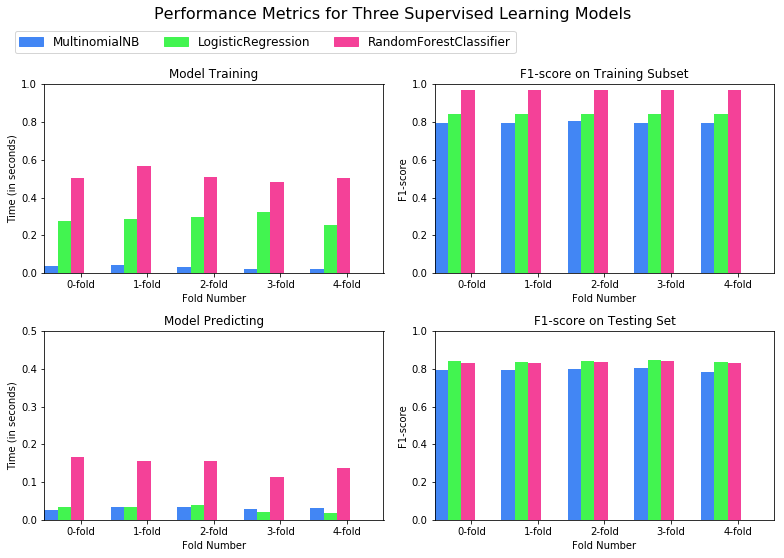

In [50]:
evaluate(results)

In [51]:
#Computing average F1 score for Classifiers

def compute_avg(name):
    x_bar_train, x_bar_test = 0, 0

    for i in range(0,5):
        x_bar_train += results[str(name)][i]['f_train']
        x_bar_test += results[name][i]['f_test']

    x_bar_train/=5
    x_bar_test/=5

    print('Classifier : {0}\nMean F1 Score for training {1}, \nMean F1 Score for testing {2}'.format(name, x_bar_train,x_bar_test))

for learner in results.keys():
    compute_avg(str(learner))

Classifier : MultinomialNB
Mean F1 Score for training 0.7957974613283498, 
Mean F1 Score for testing 0.7949683772484535
Classifier : LogisticRegression
Mean F1 Score for training 0.8421232571423293, 
Mean F1 Score for testing 0.8397298742347689
Classifier : RandomForestClassifier
Mean F1 Score for training 0.9697136240355413, 
Mean F1 Score for testing 0.8330985228973459


In [52]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import train_test_split

def ConductGridSearch(clf,parameters):
    # Split the 'features' and 'income' data into training and validation sets
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

    scorer = make_scorer(f1_score,average='micro')

    # Performing grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(estimator=clf,param_grid = parameters,scoring = scorer)

    # Fitting the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_tr,y_tr)

    # Getting the estimator
    best_clf = grid_fit.best_estimator_

    # Making predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_val)
    best_predictions = best_clf.predict(X_val)

    # Report the before-and-afterscores
    print('{0}\n'.format(clf.__class__.__name__))
    print("\nOptimized Model\n------")
    print("Final F-score on the testing data: {:.4f}".format(f1_score(y_val, best_predictions,average='micro')))
    
    return best_clf

C:\Users\ravit\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [54]:
# lg_best_clf = ConductGridSearch(LogisticRegression(random_state = 0),{'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]})

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10, 20],
              "min_samples_split": [2, 3, 10, 20],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rf_best_clf = ConductGridSearch(RandomForestClassifier(random_state = 0),param_grid)


RandomForestClassifier


Optimized Model
------
Final F-score on the testing data: 0.8498


In [55]:
print(rf_best_clf)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [56]:
rf_best_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [57]:
predictions_test = rf_best_clf.predict(X_test)

In [58]:
f1_score(y_true = y_test,y_pred = predictions_test,average='micro')

0.86010276810873532